In [106]:
#imports
import numpy as np 
import copy as cp


#adds given value to total score
def add_score(sc, val):
    sc += val
    return sc

#move the grid to the left and update score
def move_left(grid, score):
    for i in range(4):
        non_zero = [x for x in grid[i,:] if x != 0]
        zero = [0] * (4 - len(non_zero))
        grid[i,:] = np.array(non_zero + zero)
        for j in range(3):
            if grid[i,j] == grid[i,j+1]:
                grid[i,j] *= 2
                score = add_score(score, grid[i,j])
                grid[i,j+1] = 0
        non_zero = [x for x in grid[i,:] if x != 0]
        zero = [0] * (4 - len(non_zero))
        grid[i,:] = np.array(non_zero + zero)
    return (grid,score)

#move the grid to the right and update score
def move_right(grid, score):
    for i in range(4):
        non_zero = [x for x in grid[i,:] if x != 0]
        zero = [0] * (4 - len(non_zero))
        grid[i,:] = np.array(zero + non_zero[::-1])
        for j in range(3, 0, -1):
            if grid[i,j] == grid[i,j-1]:
                grid[i,j] *= 2
                score = add_score(score, grid[i,j])
                grid[i,j-1] = 0
        non_zero = [x for x in grid[i,:] if x != 0]
        zero = [0] * (4 - len(non_zero))
        grid[i,:] = np.array(zero + non_zero[::-1])
    return (grid,score)

#move the grid up and update score
def move_up(grid, score):
    for i in range(4):
        non_zero = [x for x in grid[:,i] if x != 0]
        zero = [0] * (4 - len(non_zero))
        grid[:,i] = np.array(non_zero + zero)
        for j in range(3):
            if grid[j,i] == grid[j+1,i]:
                grid[j,i] *= 2
                score = add_score(score, grid[j,i])
                grid[j+1,i] = 0
        non_zero = [x for x in grid[:,i] if x != 0]
        zero = [0] * (4 - len(non_zero))
        grid[:,i] = np.array(non_zero + zero)
    return (grid,score)

#move the grid down and update score
def move_down(grid, score):
    for i in range(4):
        non_zero = [x for x in grid[:,i] if x != 0]
        zero = [0] * (4 - len(non_zero))
        grid[:,i] = np.array(zero + non_zero[::-1])
        for j in range(3, 0, -1):
            if grid[j,i] == grid[j-1,i]:
                grid[j,i] *= 2
                score = add_score(score, grid[j,i])
                grid[j-1,i] = 0
        non_zero = [x for x in grid[:,i] if x != 0]
        zero = [0] * (4 - len(non_zero))
        grid[:,i] = np.array(zero + non_zero[::-1])
    return (grid,score)

#generates new tile
def add_new_number(grid):
    zero_indices = np.where(grid == 0)
    if len(zero_indices[0]) == 0:
        return False
    index = np.random.choice(len(zero_indices[0]))
    i, j = zero_indices[0][index], zero_indices[1][index]
    grid[i,j] = 2 if np.random.random() < 0.9 else 4
    return True

#checks whether it is Game Over
def check_game_over(grid):
    
    if np.all(grid) == False:
        return False
    
    for row in range(4):
        for col in range(4):
            if row != 3:
                if (grid[row,col]==grid[row+1,col]):
                    return False
            if col != 3:
                if (grid[row,col]==grid[row,col+1]):
                    return False
            
    return True

#checks for potential win
def check_win(grid):
    return 2048 in grid

#move the grid in specified direction, check for win or lose
#raises RuntimeError "GO" if the game is in GAME OVER state
#raises RuntimeError "WIN" if the game is in WIN state
def play_2048(grid, move, score):
    
    orig_grid = cp.deepcopy(grid)
    
    if check_game_over(grid):
        raise RuntimeError("GO")
        
    if move == 'left':
        grid, score = move_left(grid, score)
    elif move == 'right':
        grid, score = move_right(grid, score)
    elif move == 'up':
        grid, score = move_up(grid, score)
    elif move == 'down':
        grid, score = move_down(grid, score)
    else:
        raise ValueError("Invalid move")
   
    if check_win(grid):
        raise RuntimeError("WIN")

    #check whether the move was possible
    if np.array_equal(grid,orig_grid) == False:
        add_new_number(grid)
    return (grid,score)

#starts a new game by generating two tiles and setting score to 0
def new_game():
    score = 0
    grid = np.zeros((4,4), dtype=int)
    add_new_number(grid)
    add_new_number(grid)
    
    return (grid, score)

#print of the grid
def print_grid(grid, score):
    print('Score: ', score)
    print("+----+----+----+----+")
    for i in range(4):
        line = "|"
        for j in range(4):
            if grid[i,j] == 0:
                line += "    |"
            else:
                line += "{:4d}|".format(grid[i,j])
        print(line)
        print("+----+----+----+----+")



In [107]:
# FUNCTIONS FOR DATA LOGGING
import pandas as pd
import matplotlib.pyplot as plt
import statistics as stat

def outputToFile(grid, methodName = "test"):
    score = str(grid.sum()).center(8)
    maxTile = grid.max()
    wasGameWon = maxTile >= 2024
    f = open("./output/"+methodName+".txt", "a")
    f.write(f"game was {"WON" if wasGameWon else "LOST" } ")
    f.write(f"Score:{score}")
    f.write(f"Biggest tile:{str(maxTile).center(8)}\n")
    f.close()
    
""" # Datalogger
class DataLogger:
    
    df = pd.DataFrame(columns=['score', 'moves','maxTile', 'gameStatus'])
    
    def __init__(self, solver, N):
        self.solver = solver
        self.N = N
        for i in range(self.N):
            grid, score, moves = self.solver()
            maxTile = grid.max()
            gameStatus = "WON" if maxTile>=2024 else "LOST"
            
            self.df.loc[i,'score'] = score
            self.df.loc[i,'moves'] = moves
            self.df.loc[i,'maxTile'] = maxTile
            self.df.loc[i,'gameStatus'] = gameStatus if moves > 0 else "UNFINISHED"

    def dataDf(self, sorted=True):
        print(self.solver.__name__)
        if sorted:
            sorted_df = self.df.sort_values(by='score')
            print(sorted_df)
        else:
            print(self.df)
    
    def __max(self):
        return self.df.sort_values(by='score',ascending=False).iloc[0]
    
    def __min(self):
        return self.df.sort_values(by='score').iloc[0]
    
    def __avg(self):
        return stat.mean(self.df['score'])
    
    def __numOfWins(self):
        return self.df['gameStatus'].value_counts().get('WON',0)
    
    def __numOfLosses(self):
        return self.df['gameStatus'].value_counts().get('LOST',0)
        
    def stats(self):
        print(f"Average score in {self.N} runs was: {stat.mean(self.df["score"])}")
        print(f"Number of losses to wins is {self.__numOfLosses()}:{self.__numOfWins()}")
        print(f"The best was run {str(self.__max().name)}:\n{str(self.__max())}")
        print()
        print(f"The worst was run {str(self.__min().name)}:\n{str(self.__min())}")
        
    def plot(self):
        self.df.plot(title=self.solver.__name__)
        
    def subPlot(self):
        score = self.df['score']
        plt.subplot(1,2,1)
        plt.plot(score)
        
        score = self.df['maxTile']
        plt.subplot(1,2,2)
        plt.plot(score) """

class DataLogger:
    
    dataFrames = {}
    solvers = []
    N = 100

    
    def __init__(self, solvers, N):
        self.N = N
        self.solvers = solvers
        for i in range(len(solvers)):
            solver = solvers[i]
            key = solver.__name__
            self.dataFrames[key] = pd.DataFrame(columns=['score', 'moves','maxTile', 'gameStatus'])
            for i in range(self.N):
                grid, score, moves = solver()
                maxTile = grid.max()
                gameStatus = "WON" if maxTile>=2024 else "LOST"
                
                self.dataFrames[key].loc[i,'score'] = score
                self.dataFrames[key].loc[i,'moves'] = moves
                self.dataFrames[key].loc[i,'maxTile'] = maxTile
                self.dataFrames[key].loc[i,'gameStatus'] = gameStatus if moves > 0 else "UNFINISHED"

    def dataDf(self, sorted=True):
        for i in range(len(self.solvers)):
        
            print(self.solvers[i].__name__)
            df = self.dataFrames[self.solvers[i].__name__]
            if sorted:
                sorted_df = df.sort_values(by='score',ascending=False)
                print(sorted_df)
            else:
                print(df)
    
    def __max(self, solver):
        df = self.dataFrames[solver.__name__]
        
        return df.sort_values(by='score',ascending=False).iloc[0]
    
    def __min(self, solver):
        df = self.dataFrames[solver.__name__]
        
        return df.sort_values(by='score').iloc[0]
    
    def __avg(self, solver):
        df = self.dataFrames[solver.__name__]
        
        return stat.mean(df['score'])
    
    def __numOfWins(self,solver):
        df = self.dataFrames[solver.__name__]
        return df['gameStatus'].value_counts().get('WON',0)
    
    def __numOfLosses(self,solver ):
        df = self.dataFrames[solver.__name__]
        return df['gameStatus'].value_counts().get('LOST',0)
        
    def stats(self):
        
        bestSolver = ""
        
        temp = 0
        for solver in self.solvers:
            solverMax = self.__max(solver)
            solverMin = self.__min(solver)
            solverAvg = stat.mean(self.dataFrames[solver.__name__]["score"])
            
            if solverAvg > temp:
                temp = solverAvg
                bestSolver = str(solver.__name__)
            
            print(str(solver.__name__).center(30))
            print(f"Average score in {self.N} runs was: {solverAvg}")
            print(f"Number of losses to wins is {self.__numOfLosses(solver)}:{self.__numOfWins(solver)}")
            print()
            print(f"The best was run {str(solverMax.name)}:\n{str(solverMax)}")
            print()
            print(f"The worst was run {str(solverMin.name)}:\n{str(solverMin)}")
            print("---------------------------------------------------")
        
        print(f"Solver with the best average score is {bestSolver} with {temp} score")
        
    def plot(self):
        for solver in self.solvers:
            self.dataFrames[solver.__name__].plot(title=solver.__name__)
        
    def subPlot(self):
        for solver in self.solvers:
            df = self.dataFrames[solver.__name__]
            
            score = df['score']
            plt.subplot(211)
            plt.title('Score')   
            plt.plot(score, label=solver.__name__)
            plt.legend(loc = (0, 1.2), ncol=(self.N+1))
            
            score = df['maxTile']
            plt.subplot(212)
            plt.title('MaxTile')   
            plt.plot(score, label=solver.__name__) 
            
    
    
    
    
    
    
    
    
    

In [108]:
#Circle direction solver

def CircleSolver():
    curr_grid, score = new_game()
    moves = 0
    for i in range(1000):
        if (i%4 == 0):
            direction = 'right'
        elif (i%4 == 1):
            direction = 'down'
        elif (i%4 == 2):
            direction = 'left'
        else:
            direction = 'up'
        try:
            curr_grid, score = play_2048(curr_grid, direction, score)
        except RuntimeError as inst:
            if(str(inst)=="GO"):
                moves = i+1
            elif(str(inst)=="WIN"):
                moves = i+1
                
            break
    return (curr_grid, score, moves)




In [109]:
#RightDown direction solver
def RightDownSolver():
    curr_grid, score = new_game()
    prev_grid = np.zeros((4,4), dtype=int)
    moves = 0

    for i in range(1000):
        if not (prev_grid == curr_grid).all():
            direction = 'up'
        else:
            if (i%2 == 0):
                direction = 'right'
            else :
                direction = 'down'
        try:
            prev_grid = cp.deepcopy(curr_grid)
            curr_grid, score = play_2048(curr_grid, direction, score)
        except RuntimeError as inst:
            if(str(inst)=="GO"):
                moves = i+1
            elif(str(inst)=="WIN"):
                moves = i+1
            break
    return curr_grid, score, moves

In [110]:
#LeftRight direction solver
def LeftRightSolver():
    curr_grid, score = new_game()
    prev_grid = np.zeros((4,4), dtype=int)
    moves = 0
    for i in range(1000):
        if not (prev_grid == curr_grid).all():
            if (i%2 == 0):
                direction = 'up'
            else :
                direction = 'down'

        else:
            if (i%2 == 0):
                direction = 'right'
            else :
                direction = 'left'
        try:
            prev_grid = cp.deepcopy(curr_grid)
            curr_grid, score = play_2048(curr_grid, direction, score)
        except RuntimeError as inst:
            if(str(inst)=="GO"):
                moves = i+1
            elif(str(inst)=="WIN"):
                moves = i+1
            break
    return curr_grid, score, moves

In [111]:
#MiniMax direction solver
def MiniMaxSolver():
    curr_grid, score = new_game()
    moves = 0
    for i in range(1000):
        choices = {
            'up': 0,
            'down':0,
            'left':0,
            'right': 0
        }

        try:
            for choice in choices:
                _, choices[choice] = play_2048(curr_grid, choice, score)
            direction = max(choices, key=choices.get)
            #print(curr_grid, direction, choices['up'],choices['down'],choices['left'],choices['right'])

            curr_grid, score = play_2048(curr_grid, direction, score)
        except RuntimeError as inst:
            if(str(inst)=="GO"):
                moves = i+1
            elif(str(inst)=="WIN"):
                moves = i+1
            break
    return curr_grid, score, moves

In [112]:
#Random direction solver
def RandomSolver():
    curr_grid, score = new_game()
    moves = 0
    for i in range(1000):
        direction = np.random.choice(('left','right','up','down'))
        try:
            curr_grid, score = play_2048(curr_grid, direction, score)
        except RuntimeError as inst:
            if(str(inst)=="GO"):
                moves = i+1
            elif(str(inst)=="WIN"):
                moves = i+1
            break
    return curr_grid, score, moves

         CircleSolver         
Average score in 1000 runs was: 2390
Number of losses to wins is 1000:0

The best was run 771:
score         6948
moves          481
maxTile        512
gameStatus    LOST
Name: 771, dtype: object

The worst was run 94:
score          472
moves           69
maxTile         64
gameStatus    LOST
Name: 94, dtype: object
---------------------------------------------------
         RandomSolver         
Average score in 1000 runs was: 1064
Number of losses to wins is 1000:0

The best was run 473:
score         3036
moves          293
maxTile        256
gameStatus    LOST
Name: 473, dtype: object

The worst was run 374:
score          144
moves           40
maxTile         16
gameStatus    LOST
Name: 374, dtype: object
---------------------------------------------------
       LeftRightSolver        
Average score in 1000 runs was: 634
Number of losses to wins is 1000:0

The best was run 202:
score         2480
moves          242
maxTile        256
gameStatus  

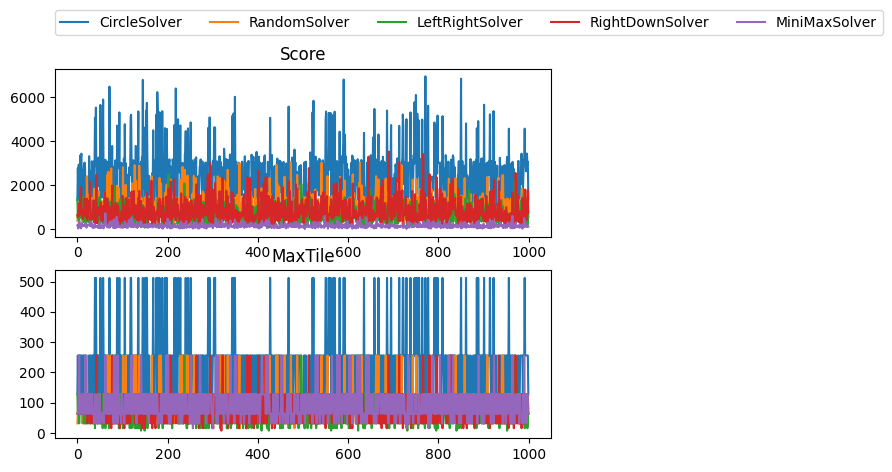

In [113]:
solvers = [CircleSolver, RandomSolver, LeftRightSolver, RightDownSolver,MiniMaxSolver]

""" circleSolver = DataLogger(solvers[0], 200)
randomSolver = DataLogger(solvers[1], 200)
leftRightSolver = DataLogger(solvers[2], 200)
rightDownSolver = DataLogger(solvers[3], 200)
minimaxSolver = DataLogger(solvers[4], 200)

eachSolver = [circleSolver,randomSolver,leftRightSolver,rightDownSolver,minimaxSolver] """

""" for solver in range(len(solvers)):
    solver = DataLogger(solvers[solver], 100)
    #solver.dataDf()
    solver.stats() """
    
dataframe = DataLogger(solvers, 1000)
dataframe.stats()
dataframe.subPlot()
